##binary Classification(MNIST)

# 1. 데이터 준비

In [1]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
X_train.shape

(60000, 28, 28)

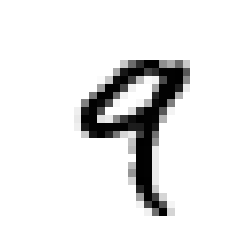

label:  9


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = X_train[4]
label = y_train[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.axis('off')
plt.show()
print('label: ', label)

In [0]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [5]:
print(y_test_5)

[False False False ... False  True False]


# 2. 데이터 전처리

In [0]:
X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255

# 3. 네트워크 정의 + 컴파일

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(32, input_shape=(28*28,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, activation='softmax'))

model.compile(loss = 'binary_crossentropy', #'mse'
             optimizer = 'sgd',
             metrics = ['accuracy'])

model.summary()

Using TensorFlow backend.
W0712 06:45:03.545816 139759871502208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 06:45:03.584466 139759871502208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 06:45:03.591363 139759871502208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 06:45:03.636656 139759871502208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 06:45:03.660639 13975987

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 26,209
Trainable params: 26,209
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습

In [8]:
hist = model.fit(X_train, y_train_5, epochs=1)

W0712 06:45:03.938737 139759871502208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/1
60000/60000 [==============================] - 11s 187us/step - loss: 0.1716 - acc: 0.9375


In [9]:
loss, acc = model.evaluate(X_train, y_train_5, verbose=0)
print(loss)
print(acc)

0.0993846803377072
0.9689666666666666


# 5. 분류 결과 분석

### - 혼동 행렬(confusion matrix)

In [10]:
from tensorflow.keras.utils import to_categorical

y_pred_5 = model.predict(X_test).ravel()
y_pred_5 = y_pred_5 > 0.5
print(y_pred_5)
print(y_test_5)

[False False False ... False False False]
[False False False ... False  True False]


In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_5, y_pred_5) # pred는 value로 전달
print(cm)

[[9028   80]
 [ 228  664]]


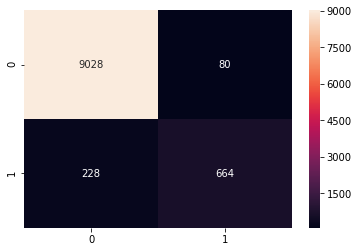

In [12]:
import pandas as pd
import seaborn as sns

df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt='d')

In [13]:
import numpy as np

y_pred_5 = model.predict(X_test).ravel()

print(y_pred_5)
print(y_test_5)

[0.00356984 0.08680904 0.01329464 ... 0.01526061 0.36520022 0.00101826]
[False False False ... False  True False]


### - Precision-Recall 커브(curve)

[0.09611033 0.09601293 0.09602328 ... 1.         1.         1.        ]
[1.         0.99887892 0.99887892 ... 0.00224215 0.00112108 0.        ]
[1.3461709e-04 1.3503432e-04 1.3551116e-04 ... 9.8623443e-01 9.8722720e-01
 9.8738992e-01]
9207
9207
9206
10000


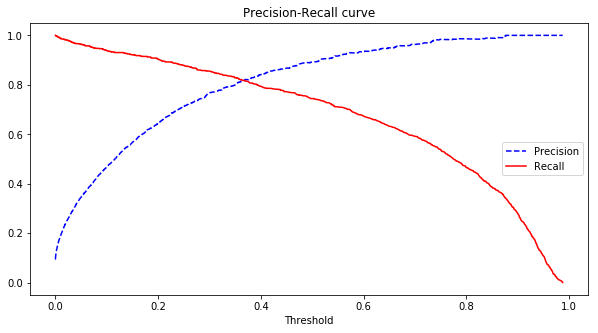

In [14]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_pred_5) # pred 인자는 score(probability) 값으로 전달
print(precisions)
print(recalls)
print(thresholds)
print(len(precisions))
print(len(recalls))
print(len(thresholds))
print(len(y_test_5))

plt.figure(figsize=(10,5))
plt.title('Precision-Recall curve')
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

### - ROC 커브(curve)

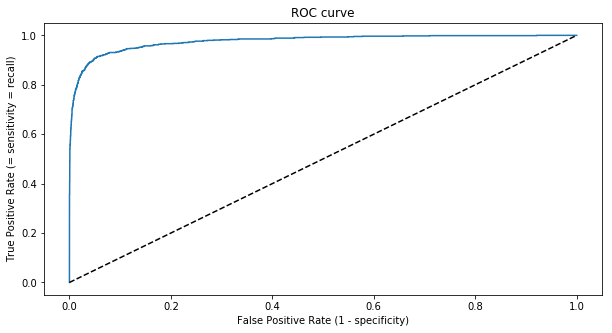

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_5)

plt.figure(figsize=(10,5))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (= sensitivity = recall)')
plt.show()

In [16]:
from sklearn.linear_model import Perceptron

perceptron = Sequential()
perceptron.add(Dense(1, input_shape=(28*28,), activation='sigmoid'))
perceptron.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
perceptron.fit(X_train, y_train_5,
              epochs = 1)

Epoch 1/1
60000/60000 [==============================] - 7s 108us/step - loss: 0.1903 - acc: 0.9276


In [17]:
y_perceptron = perceptron.predict(X_test)
print(y_perceptron)

[[0.02285129]
 [0.13973859]
 [0.04978207]
 ...
 [0.02683452]
 [0.12772074]
 [0.00317928]]


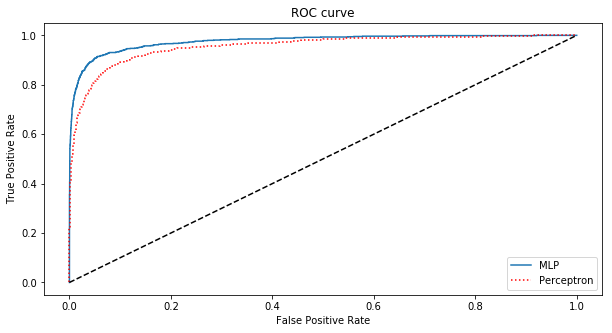

In [18]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y_test_5, y_pred_5)
fpr2, tpr2, thresholds2 = roc_curve(y_test_5, y_perceptron)

plt.figure(figsize=(10,5))
plt.title('ROC curve')
plt.plot(fpr1, tpr1, label='MLP')
plt.plot(fpr2, tpr2, 'r:', label='Perceptron')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

auc1 = roc_auc_score(y_test_5, y_pred_5)
auc2 = roc_auc_score(y_test_5, y_perceptron)
print('AUC of MLP :', auc1)
print('AUC of Perceptron :', auc2)

AUC of MLP : 0.9761143556839601
AUC of Perceptron : 0.9538754305582634


##multiclass classification(Iris)

# 1. 데이터 준비

In [19]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset("iris")
print(type(iris))
print(iris)

<class 'pandas.core.frame.DataFrame'>
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     set

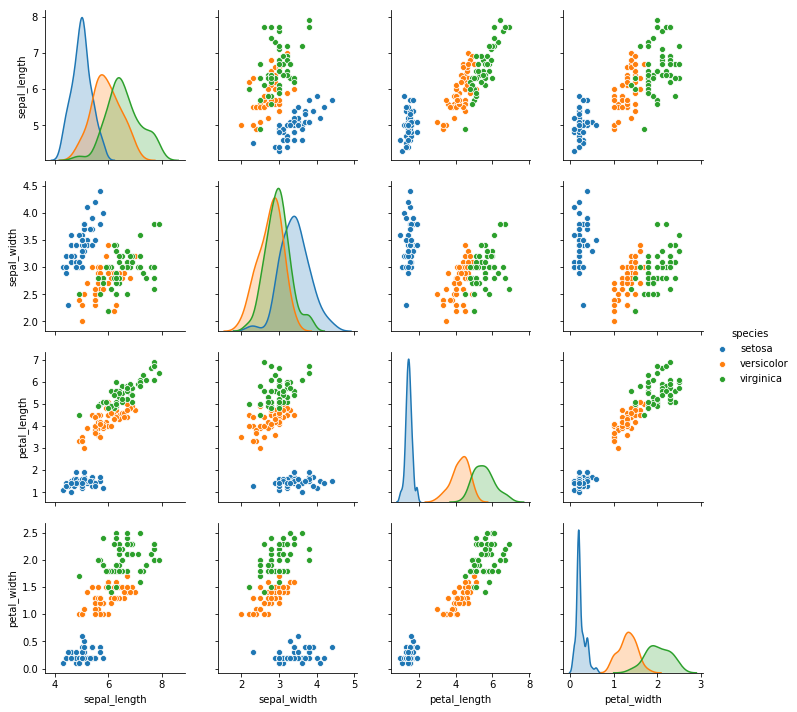

In [20]:
sns.pairplot(iris, hue="species")

In [21]:
iris.info()
iris['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
X = iris.iloc[:,0:4].values
print(X)

print()

y = iris.iloc[:,4].values
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# 2. 데이터 전처리

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1)

Y = pd.get_dummies(y1).values
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 3)
(30, 4)
(30, 3)


# 3. 네트워크 정의 + 컴파일

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.summary()

W0712 06:45:48.549189 139759871502208 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습

In [27]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.4333 - acc: 0.3667 - val_loss: 1.7370 - val_acc: 0.2000
Epoch 2/100
120/120 [==============================] - 0s 230us/sample - loss: 1.3836 - acc: 0.3667 - val_loss: 1.6716 - val_acc: 0.2000
Epoch 3/100
120/120 [==============================] - 0s 182us/sample - loss: 1.3425 - acc: 0.3667 - val_loss: 1.6100 - val_acc: 0.2000
Epoch 4/100
120/120 [==============================] - 0s 178us/sample - loss: 1.3065 - acc: 0.3667 - val_loss: 1.5527 - val_acc: 0.2000
Epoch 5/100
120/120 [==============================] - 0s 180us/sample - loss: 1.2701 - acc: 0.3667 - val_loss: 1.5020 - val_acc: 0.2000
Epoch 6/100
120/120 [==============================] - 0s 169us/sample - loss: 1.2383 - acc: 0.3667 - val_loss: 1.4573 - val_acc: 0.2000
Epoch 7/100
120/120 [==============================] - 0s 173us/sample - loss: 1.2092 - acc: 0.3750 - val_loss: 1.4173 - val_acc: 0.200

# 5. 학습 과정 확인

In [28]:
hist.history

{'acc': [0.36666667,
  0.36666667,
  0.36666667,
  0.36666667,
  0.36666667,
  0.36666667,
  0.375,
  0.375,
  0.375,
  0.375,
  0.375,
  0.375,
  0.375,
  0.4,
  0.40833333,
  0.425,
  0.45833334,
  0.51666665,
  0.55833334,
  0.6,
  0.625,
  0.64166665,
  0.68333334,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  0.69166666,
  

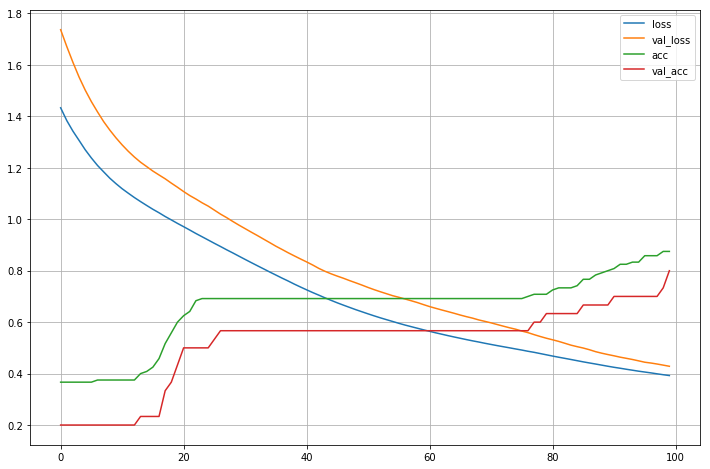

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.grid()
plt.show()

# 6. 분류 결과 분석

In [30]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

y_test_class = np.argmax(y_test, axis=1)

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.54      0.70        13
           2       0.50      1.00      0.67         6

    accuracy                           0.80        30
   macro avg       0.83      0.85      0.79        30
weighted avg       0.90      0.80      0.80        30



In [31]:
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [32]:
y_pred

array([[0.00465702, 0.2676092 , 0.72773373],
       [0.1240105 , 0.51763844, 0.35835105],
       [0.968783  , 0.02633   , 0.00488693],
       [0.00341896, 0.26378042, 0.73280066],
       [0.93911827, 0.05021831, 0.01066336],
       [0.0017834 , 0.2150884 , 0.7831282 ],
       [0.9528442 , 0.03906806, 0.00808768],
       [0.04767246, 0.47978872, 0.47253874],
       [0.04897841, 0.48053724, 0.47048432],
       [0.11250165, 0.50734454, 0.38015378],
       [0.00555889, 0.30009905, 0.6943421 ],
       [0.05134823, 0.47598195, 0.4726698 ],
       [0.03189849, 0.44476292, 0.52333856],
       [0.0481285 , 0.47497836, 0.47689316],
       [0.02745403, 0.42989686, 0.54264915],
       [0.9432504 , 0.04691555, 0.00983402],
       [0.03349112, 0.44382548, 0.5226834 ],
       [0.02998072, 0.43196583, 0.53805345],
       [0.9316932 , 0.05594396, 0.01236279],
       [0.9685089 , 0.02642395, 0.00506718],
       [0.00688751, 0.30047965, 0.69263285],
       [0.02127024, 0.40414706, 0.57458264],
       [0.

In [33]:
cm = confusion_matrix(y_test_class, y_pred_class) # 가로-세로 축 유의
print(cm)

[[11  0  0]
 [ 0  7  6]
 [ 0  0  6]]


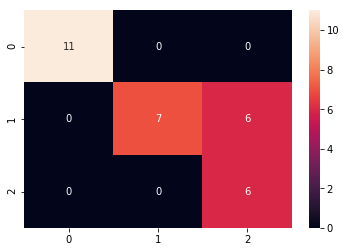

In [34]:
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt='d')

##multiclass classification(MNIST)

# 1. 데이터 준비

In [0]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [36]:
print(train_images.shape)
print(len(train_images))
print(train_images.ndim)
print(train_images.dtype)

print()

print(train_labels)
print(train_labels.shape)
print(len(train_labels))
print(train_labels.ndim)
print(train_labels.dtype)

(60000, 28, 28)
60000
3
uint8

[5 0 4 ... 5 6 8]
(60000,)
60000
1
uint8


In [0]:
# train_labels = train_labels[:]+10
# test_labels = test_labels[:]+10

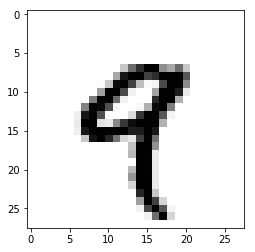

9


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[4]
label = train_labels[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(label)

# ※ 참고

In [0]:
# from pylab import *
# from numpy import outer
# rc('text', usetex=False)
# a=outer(arange(0,1,0.01),ones(10))
# figure(figsize=(15,5))
# subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
# maps = [m for m in cm.datad if not m.endswith("_r")]
# maps.sort()
# l = len(maps)+1
# for i, m in enumerate(maps):
#     subplot(1,l,i+1)
#     axis("off")
#     imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
#     title(m,rotation=90,fontsize=10)
# savefig("colormaps.png",dpi=100,facecolor='gray')

# 2. 데이터 전처리

In [0]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [41]:
train_labels[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# 3. 네트워크 정의

In [0]:
from keras.models import Sequential
from keras.layers import Dense 

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

# 4. 컴파일
- 옵티마이저, 손실 함수, 성능 척도 정의

In [0]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련시키기

In [44]:
hist = model.fit(train_images, 
                 train_labels, 
                 epochs=2, 
                 batch_size=128,
                 validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 40us/step - loss: 0.4703 - acc: 0.8734 - val_loss: 0.2662 - val_acc: 0.9228
Epoch 2/2
60000/60000 [==============================] - 2s 36us/step - loss: 0.2417 - acc: 0.9316 - val_loss: 0.2096 - val_acc: 0.9376


# 6. 모델 평가하기

In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 54us/step
test_acc: 0.9376


In [46]:
import numpy as np

test_labels = test_labels.argmax(axis=-1)
pred_labels = model.predict(test_images).argmax(axis=-1)
print('target:', test_labels[0])
print('predict:', pred_labels[0])

target: 7
predict: 7


# ※ 오류 분석(error analysis)

In [47]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(test_labels, pred_labels) # pred는 value로 전달
print(cm)

[[ 951    0    1    3    0    5   13    2    4    1]
 [   0 1116    4    1    1    1    3    1    8    0]
 [   3    5  951   15   11    4    8    7   25    3]
 [   0    1   13  945    0   21    1    9   14    6]
 [   0    1    4    0  926    0   14    3    5   29]
 [   5    2    3   30    3  803   11    2   25    8]
 [   6    3    5    2    8   10  920    1    3    0]
 [   1   12   23    6    8    0    0  943    3   32]
 [   3    9    5   24    7   13   11    9  888    5]
 [   5   10    1   14   25    6    1    8    6  933]]


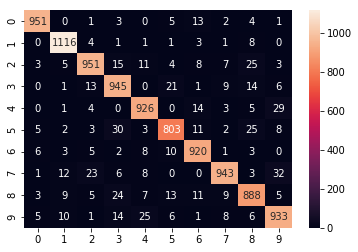

In [48]:
import pandas as pd
import seaborn as sns

df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt='d')

In [49]:
X_33 = test_images[(test_labels == 3) & (pred_labels == 3)]
X_35 = test_images[(test_labels == 3) & (pred_labels == 5)]
X_53 = test_images[(test_labels == 5) & (pred_labels == 3)]
X_55 = test_images[(test_labels == 5) & (pred_labels == 5)]

print(X_33.shape)
print(X_35.shape)
print(X_53.shape)
print(X_55.shape)

(945, 784)
(21, 784)
(30, 784)
(803, 784)


In [0]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'binary', **options)
    plt.axis("off")

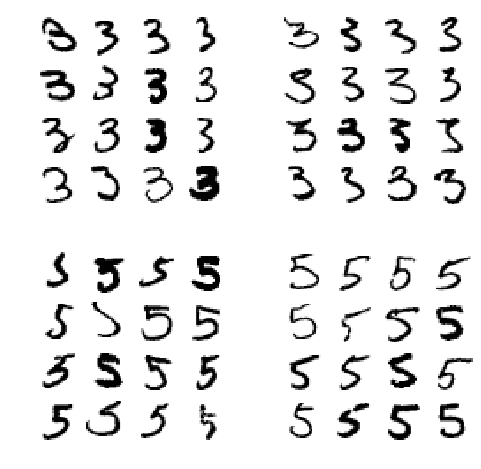

In [51]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_33[:16], images_per_row=4)
plt.subplot(222); plot_digits(X_35[:16], images_per_row=4)
plt.subplot(223); plot_digits(X_53[:16], images_per_row=4)
plt.subplot(224); plot_digits(X_55[:16], images_per_row=4)
plt.show()